<a href="https://colab.research.google.com/github/sid1336/Computational-Physics-Projects/blob/main/Pendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Double Pendulum Simulation - Part 1

## Introduction to Classical Mechanics

Physics students encounter classical mechanics in their first semester. This subject is often taken alongside math courses teaching algebra and calculus. Revisiting this subject with a better understanding of the necessary mathematical apparatus can provide deeper insights. One of the coolest things learned in classical mechanics is that the choice of the coordinate system, reference frame, and computational approach matter. A smart choice can significantly simplify the problem-solving process.

## Problem Description: Double Pendulum

### System Description
- **Pendulum 1:** Mass $m_1$, length $l_1$
- **Pendulum 2:** Mass $m_2$, length $l_2$
- **Angles:** $\theta_1$ and $\theta_2$ (measured from the vertical)

### Kinetic Energy
The kinetic energy $T$ is the sum of the kinetic energies of both masses. For a point mass in a plane, the kinetic energy is given by:

$$
T = \frac{1}{2} m v^2
$$

For the first pendulum:

$$
T_1 = \frac{1}{2} m_1 (v_{1x}^2 + v_{1y}^2)
$$

For the second pendulum:

$$
T_2 = \frac{1}{2} m_2 (v_{2x}^2 + v_{2y}^2)
$$

### Velocities
The velocities of the masses can be expressed in terms of the angular velocities $\dot{\theta}_1$ and $\dot{\theta}_2$:

$$
v_{1x} = l_1 \dot{\theta}_1 \cos(\theta_1)
$$

$$
v_{1y} = l_1 \dot{\theta}_1 \sin(\theta_1)
$$

$$
v_{2x} = v_{1x} + l_2 \dot{\theta}_2 \cos(\theta_2)
$$

$$
v_{2y} = v_{1y} + l_2 \dot{\theta}_2 \sin(\theta_2)
$$

### Potential Energy
The potential energy $V$ is due to gravity and is given by:

$$
V = m g h
$$

For the first pendulum:

$$
V_1 = -m_1 g l_1 \cos(\theta_1)
$$

For the second pendulum:

$$
V_2 = -m_2 g (l_1 \cos(\theta_1) + l_2 \cos(\theta_2))
$$

### Lagrangian
The Lagrangian $L$ is given by the difference between the kinetic and potential energies:

$$
L = T - V
$$

## Step 2: Euler-Lagrange Equations

The Euler-Lagrange equation for each angle $\theta_1$ and $\theta_2$ is given by:

$$
\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{\theta}} \right) - \frac{\partial L}{\partial \theta} = 0
$$

## Step 3: Deriving the Equations of Motion

Let's derive the equations of motion for $\theta_1$ and $\theta_2$. These will be two coupled second-order differential equations.

## Explanation

### System Description
We start by describing the double pendulum system, which consists of two masses $m_1$ and $m_2$ connected by rods of lengths $l_1$ and $l_2$. The angles $\theta_1$ and $\theta_2$ are measured from the vertical.

### Kinetic and Potential Energies
The kinetic energy for each pendulum is calculated using their velocities, which are expressed in terms of the angular velocities $\dot{\theta}_1$ and $\dot{\theta}_2$. The potential energy is determined by the heights of the masses in a gravitational field.

### Lagrangian
The Lagrangian $L$ is the difference between the total kinetic energy and the total potential energy of the system.

### Euler-Lagrange Equations
The Euler-Lagrange equations provide a way to derive the equations of motion for the system. These equations are second-order differential equations that describe how the angles $\theta_1$ and $\theta_2$ change over time.

In the next part, we will use these equations to simulate the motion of the double pendulum using Python.


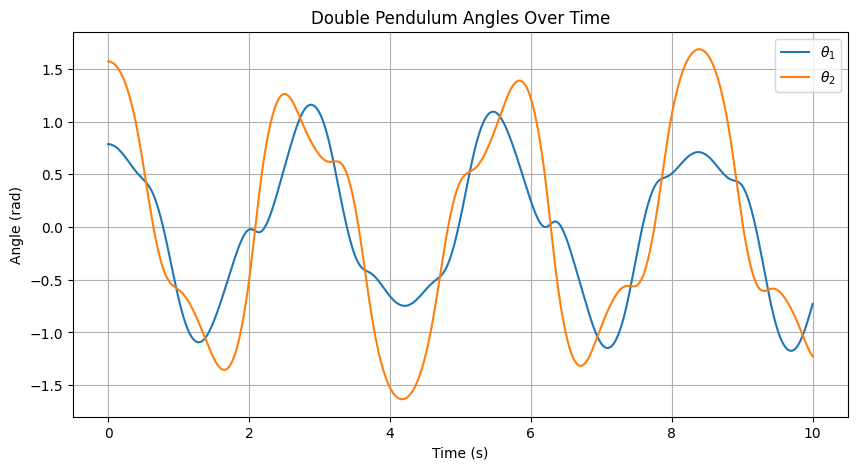

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
g = 9.81  # acceleration due to gravity, in m/s^2
l1 = 1.0  # length of first pendulum in m
l2 = 1.0  # length of second pendulum in m
m1 = 1.0  # mass of first pendulum in kg
m2 = 1.0  # mass of second pendulum in kg

def equations(t, y):
    theta1, z1, theta2, z2 = y
    c, s = np.cos(theta1-theta2), np.sin(theta1-theta2)

    theta1_dot = z1
    theta2_dot = z2

    z1_dot = (m2*g*np.sin(theta2)*c - m2*s*(l1*z1**2*c + l2*z2**2) -
              (m1+m2)*g*np.sin(theta1)) / l1 / (m1 + m2*s**2)
    z2_dot = ((m1+m2)*(l1*z1**2*s - g*np.sin(theta2) + g*np.sin(theta1)*c) +
              m2*l2*z2**2*s*c) / l2 / (m1 + m2*s**2)

    return [theta1_dot, z1_dot, theta2_dot, z2_dot]

# Initial conditions: theta1, theta1_dot, theta2, theta2_dot
y0 = [np.pi / 4, 0, np.pi / 2, 0]

# Time span
t_span = (0, 10)
t_eval = np.linspace(*t_span, 1000)

# Solve the differential equations
sol = solve_ivp(equations, t_span, y0, t_eval=t_eval)

# Extract results
theta1, theta2 = sol.y[0], sol.y[2]

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(t_eval, theta1, label=r'$\theta_1$')
plt.plot(t_eval, theta2, label=r'$\theta_2$')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.title('Double Pendulum Angles Over Time')
plt.grid(True)
plt.show()


# Double Pendulum Simulation - Part 2

## Introduction

Recently, we talked about different ways to formulate a classic problem — the double pendulum. We finally arrived at the Lagrangian method. Today, we will write down the Lagrangian of the system and derive the Euler-Lagrange equations of motion. We will also take a look at the Hamiltonian method, yet another approach to solve physics problems. The resulting equations of motion cannot be solved analytically; they are too complicated for that. They can, however, be solved numerically, which we will do in the last part of this topic.

## Lagrangian Formalism

To recap, we defined a Lagrangian as the difference between the kinetic energy and the potential energy of the system:

$$
L = T - V
$$

The trajectory of the system must then satisfy the Euler-Lagrange equation of motion (EoM):

$$
\frac{\textrm{d}}{\textrm{d}t}\frac{\partial L}{\partial \dot{x}} = \frac{\partial L}{\partial x}
$$

First, let us write down the horizontal $x$ and vertical $y$ Cartesian coordinates in terms of the relevant degrees of freedom. For the first pendulum we have:

$$
x_1 = l_1 \sin(\theta_1) \qquad y_1 = -l_1 \cos(\theta_1)
$$

This should be self-evident. The position of the second pendulum will look similar; it will just be offset by the position of the first pendulum:

$$
x_2 = l_1\sin(\theta_1) + l_2 \sin(\theta_2) \qquad y_2 = -l_1\cos(\theta_1) - l_2 \cos(\theta_2)
$$

To express the Lagrangian, we need the potential energy, which depends on the vertical coordinates of the two pendulums, and the kinetic energy that is proportional to the square of the velocity. So, in order to get the velocity, we derive the coordinates above in time:

$$
v_{x\,1} = l_1 \cos(\theta_1)\dot{\theta}_1 \qquad v_{y\,1} = l_1 \sin(\theta_1)\dot{\theta}_1
$$

$$
v_{x\,2} = l_1 \cos(\theta_1)\dot{\theta}_1 + l_2 \cos(\theta_2)\dot{\theta}_2 \qquad v_{y\,2} = l_1 \sin(\theta_1)\dot{\theta}_1 + l_2 \sin(\theta_2)\dot{\theta}_2
$$

The square of the velocity of the first pendulum is then:

$$
v^2_1 = l_1^2 \sin^2(\theta_1)\dot{\theta}_1^2 + l_1^2 \cos^2(\theta_1)\dot{\theta}_1^2 = l_1^2 \dot{\theta}_1^2 \left[\sin^2(\theta_1) + \cos^2(\theta_1)\right] = \left(l_1 \dot{\theta}_1\right)^2
$$

The velocity of the second one is a bit trickier:

$$
v^2_2 = l_1^2 \cos^2(\theta_1)\dot{\theta}_1^2 + 2l_1l_2\cos(\theta_1)\cos(\theta_2)\dot{\theta}_1\dot{\theta}_2 + l_2^2\cos^2(\theta_2)\dot{\theta}_2^2 + l_1^2 \sin^2(\theta_1)\dot{\theta}_1^2 + 2l_1l_2\sin(\theta_1)\sin(\theta_2)\dot{\theta}_1\dot{\theta}_2 + l_2^2\sin^2(\theta_2)\dot{\theta}_2^2
$$

Here we can again use the sum rule for the squares of trigonometric functions. This leaves us with:

$$
v^2_2 = \left(l_1\dot{\theta}_1\right)^2 + \left(l_2\dot{\theta}_2\right)^2 + 2l_1l_2\dot{\theta}_1\dot{\theta}_2\left[\sin(\theta_1)\sin(\theta_2) + \cos(\theta_1)\cos(\theta_2)\right]
$$

The expression inside the square bracket is awfully reminiscent of a trigonometric identity — a quick Wikipedia visit later we can write:

$$
v^2_2 = \left(l_1\dot{\theta}_1\right)^2 + \left(l_2\dot{\theta}_2\right)^2 + 2l_1l_2\dot{\theta}_1\dot{\theta}_2\cos(\theta_1 - \theta_2)
$$

Now that we have rewritten our coordinates and velocities in terms of the two angular degrees of freedom of the system, we should be able to express the kinetic and potential energy of the system easily:

$$
T = \frac{1}{2}m_1\left(l_1 \dot{\theta}_1\right)^2 + \frac{1}{2}m_2\left[\left(l_1\dot{\theta}_1\right)^2 + \left(l_2 \dot{\theta}_2\right)^2 + 2l_1l_2\dot{\theta}_1\dot{\theta}_2\cos(\theta_1 - \theta_2)\right]
$$

$$
V = -gl_1\left(m_1 + m_2 \right)\cos(\theta_1) - m_2gl_2\cos(\theta_2)
$$

The Lagrangian is then just the difference of these two. We can now take this Lagrangian and plug it into the Euler-Lagrange equation of motion(s). We expect two equations, one for each angular coordinate. Notice that while the kinetic energy only depends on both the velocities and position, the potential energy is solely a function of the coordinates themselves. This simplifies the next steps a tiny bit.

For $\theta_1$ we can write:

$$
\frac{\textrm{d}}{\textrm{d}t}\frac{\partial L}{\partial \dot{\theta}_1} = \frac{\textrm{d}}{\textrm{d}t} \left[m_1l_1^2\dot{\theta}_1 + m_2l_1^2\dot{\theta}_1 + m_2l_1l_2\dot{\theta}_2\cos(\theta_1 - \theta_2)\right]
$$

$$
= \left(m_1 + m_2\right)l_1^2\ddot{\theta}_1 + m_2l_1l_2\ddot{\theta}_2\cos(\theta_1 - \theta_2) - m_2l_1l_2\dot{\theta}_2\sin(\theta_1 - \theta_2)(\dot{\theta}_1 - \dot{\theta}_2)
$$

The right-hand side of the Euler-Lagrange EoM looks more tame in comparison:

$$
\frac{\partial L}{\partial \theta_1} = -gl_1\left(m_1 + m_2\right)\sin(\theta_1) - m_2l_1l_2 \dot{\theta}_1\dot{\theta}_2\sin(\theta_1 - \theta_2)
$$

We can do the same for the other coordinate, $\theta_2$:

$$
\frac{\textrm{d}}{\textrm{d}t}\frac{\partial L}{\partial \dot{\theta}_2} = \frac{\textrm{d}}{\textrm{d}t} \left[m_2l_2^2\dot{\theta}_2 + m_2l_1l_2\dot{\theta}_1\cos(\theta_1 - \theta_2)\right]
$$

$$
= m_2l_2^2\ddot{\theta}_2 + m_2l_1l_2\ddot{\theta}_1\cos(\theta_1 - \theta_2) - m_2l_1l_2\dot{\theta}_1\sin(\theta_1-\theta_2)(\dot{\theta}_1 - \dot{\theta}_2)
$$

and

$$
\frac{\partial L}{\partial \theta_2} = -gm_2l_2\sin(\theta_2) + m_2l_1l_2 \dot{\theta}_1\dot{\theta}_2\sin(\theta_1 - \theta_2)
$$

Finally, we can combine all the above and write down the actual Euler-Lagrange EoM that determine the behavior of the system:

$$
(m_1 + m_2)l_1\ddot{\theta}_1 + m_2l_2\ddot{\theta}_2\cos(\theta_1 - \theta_2) - m_2l_2\dot{\theta}_2\sin(\theta_1 - \theta_2)(\dot{\theta}_1 - \dot{\theta}_2) = -g(m_1 + m_2)\sin(\theta_1) - m_2l_2 \dot{\theta}_1\dot{\theta}_2\sin(\theta_1 - \theta_2)
$$

$$
m_2l_2\ddot{\theta}_2 + m_2l_1\ddot{\theta}_1\cos(\theta_1 - \theta_2) - m_2l_1\dot{\theta}^2_1\sin(\theta_1-\theta_2) = -gm_2\sin(\theta_2)
$$

These equations can now be solved to determine the trajectory of the point masses. However, the mathematical nature of these coupled, second-order differential equations makes any attempt at a solution very painful. In general, first-order differential equations are much nicer to work with.

## Hamiltonian Formalism

There is another way to describe physical problems. One that often makes use of the Lagrangian developed above, but which results in a set of two first-order differential equations for each degree of freedom, instead of a single second-order equation. The Lagrangian is defined as the difference between the kinetic and potential energy of a system. But the sum of these might also be of interest — after all, it is the total energy. And the total energy of an isolated system should be conserved, something that might prove helpful in our analysis.

Let us perform a Legendre transformation on the Lagrangian, moving from coordinates \( q_i \) and the corresponding velocities \( \dot{q}_i \), to coordinates and the corresponding generalized momenta \( p_i \). The Legendre transformation of the Lagrangian is the Hamiltonian:

$$
H\left(p_i, q_i\right) \equiv \sum_i p_i \dot{q}_i - L
$$

and in the absence of an explicit time dependence of the Lagrangian, it represents the total energy of the system. The generalized momenta are nothing other than:

$$
p_i \equiv \frac{\partial L}{\partial \dot{q}_i}
$$

This is something we already calculated for our coordinates $\theta_1$ and $\theta_2$. Once we write down the Hamiltonian (as a function of coordinates and their momenta only), we can compute the trajectory of the system using Hamilton’s equations of motion:

$$
\dot{q}_i = \frac{\partial H}{\partial p_i} \qquad \textrm{and} \qquad \dot{p}_i = \frac{\partial H}{\partial q_i}
$$

We first express the generalized momenta:

$$
\frac{\partial L}{\partial \dot{\theta}_1} = p_1 = (m_1 + m_2)l_1^2\dot{\theta}_1 + m_2l_1l_2\dot{\theta}_2\cos(\theta_1 - \theta_2)
$$

$$
\frac{\partial L}{\partial \dot{\theta}_2} = p_2 = m_2l_2^2\dot{\theta}_2 + m_2l_1l_2\dot{\theta}_1\cos(\theta_1 - \theta_2)
$$

which means that:

$$
\sum_i p_i \dot{q}_i = (m_1 + m_2)l_1^2\dot{\theta}_1^2 + m_2l_2^2\dot{\theta}_2^2 + 2 m_2l_1l_2\dot{\theta}_1\dot{\theta}_2\cos(\theta_1 - \theta_2)
$$

With the Lagrangian being:

$$
L = \frac{1}{2}(m_1 + m_2) l_1^2 \dot{\theta}_1^2 + \frac{1}{2}m_2l_2^2\dot{\theta}_2^2 + m_2l_1l_2\dot{\theta}_1\dot{\theta}_2\cos(\theta_1 - \theta_2) + gl_1(m_1 + m_2 )\cos(\theta_1) + m_2gl_2\cos(\theta_2)
$$

the Hamiltonian must be:

$$
H \equiv \sum_i p_i \dot{q}_i - L = \frac{1}{2}(m_1 + m_2) l_1^2 \dot{\theta}_1^2 + \frac{1}{2}m_2l_2^2\dot{\theta}_2^2 + m_2l_1l_2\dot{\theta}_1\dot{\theta}_2\cos(\theta_1 - \theta_2) - gl_1(m_1 + m_2 )\cos(\theta_1) - m_2gl_2\cos(\theta_2)
$$

Unfortunately, we are not done yet. The Hamiltonian is a function of the coordinates $\theta_1$, $\theta_2$, $p_1$, and $p_2$. We must express $\dot{\theta}_1$ and $\dot{\theta}_2$ as functions of generalized positions and momenta. To that end, we isolate $\dot{\theta}_2$ in the equation:

$$
p_2 = m_2l_2^2\dot{\theta}_2 + m_2l_1l_2\dot{\theta}_1\cos(\theta_1 - \theta_2)
$$

$$
m_2l_2^2\dot{\theta}_2 = p_2 - m_2l_1l_2\dot{\theta}_1\cos(\theta_1 - \theta_2)
$$

$$
\dot{\theta}_2 = \frac{p_2}{m_2l_2^2} - \frac{l_1}{l_2}\dot{\theta}_1\cos(\theta_1 - \theta_2)
$$

and plug into the other equation:

$$
p_1 = (m_1 + m_2)l_1^2\dot{\theta}_1 + m_2l_1l_2\cos(\theta_1 - \theta_2)\left[\frac{p_2}{m_2l_2^2} - \frac{l_1}{l_2}\dot{\theta}_1\cos(\theta_1 - \theta_2)\right]
$$

Let us gather all terms that contain $\dot{\theta}_1$:

$$
\dot{\theta}_1\left[(m_1 + m_2)l_1^2 - m_2l_1^2\cos^2(\theta_1 - \theta_2)\right] = p_1 - p_2\frac{l_1}{l_2}\cos(\theta_1 - \theta_2)
$$

whence:

$$
\dot{\theta}_1 = \frac{p_1 - p_2\frac{l_1}{l_2}\cos(\theta_1 - \theta_2)}{(m_1 + m_2)l_1^2 - m_2l_1^2\cos^2(\theta_1 - \theta_2)}
$$

Multiplying both the numerator and the denominator by $l_2$, and rearranging some terms, we get:

$$
\dot{\theta}_1 = \frac{l_2p_1 - l_1p_2\cos(\theta_1 - \theta_2)}{l_1^2l_2\left[m_1 + m_2 - m_2\cos^2(\theta_1 - \theta_2)\right]}
$$

where we use the good ol’ trigonometric identity $\sin^2(x) + \cos^2(x) = 1$ to find the final expression:

$$
\dot{\theta}_1 = \frac{l_2p_1 - l_1p_2\cos(\theta_1 - \theta_2)}{l_1^2l_2\left[m_1 + m_2\sin^2(\theta_1 - \theta_2)\right]}
$$

We could perform a similar procedure, expressing $\dot{\theta}_1$ from the other equation, plugging into the previous equation, and solving for $\dot{\theta}_2$ to find:

$$
\dot{\theta}_2 = \frac{l_1(m_1 + m_2)p_2 - l_2m_2p_1\cos(\theta_1 - \theta_2)}{l_1l_2^2m_2\left[m_1 + m_2\sin^2(\theta_1 - \theta_2)\right]}
$$

These formulas represent two of the four Hamilton’s equations we want to derive. What we need to do now is plug the expressions for $\dot{\theta}_1$ and $\dot{\theta}_2$ into the Hamiltonian, and then derive with respect to the generalized positions $\theta_1$ and $\theta_2$ in order to find the two other Hamilton’s equations. This is a rather lengthy calculation, one I would like to avoid if at all possible. If time permits, I might later update this post with the full derivation. I hope you will forgive me my laziness.

Acknowledging this caveat, we finally arrive at Hamilton’s equations of motion:

$$
\dot{\theta}_1 = \frac{l_2p_1 - l_1p_2\cos(\theta_1 - \theta_2)}{l_1^2l_2\left[m_1 + m_2\sin^2(\theta_1 - \theta_2)\right]}
$$

$$
\dot{\theta}_2 = \frac{l_1(m_1 + m_2)p_2 - l_2m_2p_1\cos(\theta_1 - \theta_2)}{l_1l_2^2m_2\left[m_1 + m_2\sin^2(\theta_1 - \theta_2)\right]}
$$

$$
\dot{p}_1 = -\left(m_1 + m_2\right)gl_1\sin(\theta_1) - A + B
$$

$$
\dot{p}_2 = -m_2gl_2\sin(\theta_2) + A - B
$$

where

$$
A \equiv \frac{p_1p_2\sin(\theta_1 - \theta_2)}{l_1l_2\left[m_1 + m_2\sin^2(\theta_1 - \theta_2)\right]}
$$

$$
B \equiv \frac{l_2^2m_2p_1^2 + l_1^2(m_1 + m_2)p_2^2 - l_1l_2m_2p_1p_2\cos(\theta_1 - \theta_2)}{2l_1^2l_2^2\left[m_1 + m_2\sin^2(\theta_1 - \theta_2)\right]^2}\sin\left[2(\theta_1 - \theta_2)\right]
$$

There, done. We eventually succeeded in writing down the equations of motion of the two masses in a double pendulum. And we did this in a form that is very conducive to numerical simulations. In the next part, we will finally get to write a Python script to simulate the time evolution of the system.

Until next time!


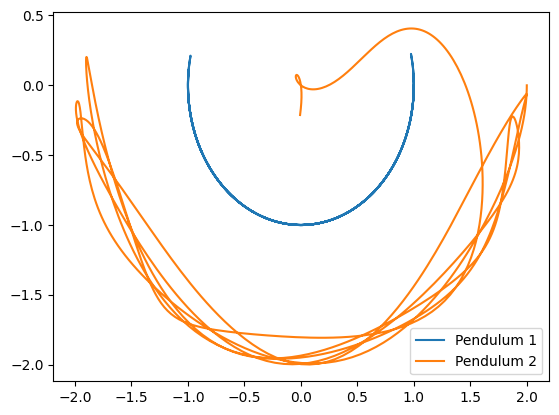

In [6]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
g = 9.81  # gravitational acceleration (m/s^2)
l1 = 1.0  # length of first pendulum (m)
l2 = 1.0  # length of second pendulum (m)
m1 = 1.0  # mass of first pendulum (kg)
m2 = 1.0  # mass of second pendulum (kg)

def equations(t, y):
    theta1, z1, theta2, z2 = y

    delta = theta2 - theta1

    den1 = (m1 + m2) * l1 - m2 * l1 * np.cos(delta) * np.cos(delta)
    den2 = (l2 / l1) * den1

    dtheta1_dt = z1
    dz1_dt = (m2 * l1 * z1 * z1 * np.sin(delta) * np.cos(delta) +
              m2 * g * np.sin(theta2) * np.cos(delta) +
              m2 * l2 * z2 * z2 * np.sin(delta) -
              (m1 + m2) * g * np.sin(theta1)) / den1

    dtheta2_dt = z2
    dz2_dt = (-m2 * l2 * z2 * z2 * np.sin(delta) * np.cos(delta) +
              (m1 + m2) * g * np.sin(theta1) * np.cos(delta) -
              (m1 + m2) * l1 * z1 * z1 * np.sin(delta) -
              (m1 + m2) * g * np.sin(theta2)) / den2

    return [dtheta1_dt, dz1_dt, dtheta2_dt, dz2_dt]

# Initial conditions: theta1, z1, theta2, z2
y0 = [np.pi / 2, 0, np.pi / 2, 0]

# Time span
t_span = (0, 10)
t_eval = np.linspace(*t_span, 1000)

# Solve ODE
solution = solve_ivp(equations, t_span, y0, t_eval=t_eval, method='RK45')

# Extract solutions
theta1 = solution.y[0]
theta2 = solution.y[2]

# Convert to Cartesian coordinates for plotting
x1 = l1 * np.sin(theta1)
y1 = -l1 * np.cos(theta1)

x2 = x1 + l2 * np.sin(theta2)
y2 = y1 - l2 * np.cos(theta2)

# Plot the results
fig, ax = plt.subplots()
ax.plot(x1, y1, label='Pendulum 1')
ax.plot(x2, y2, label='Pendulum 2')
ax.legend()

def animate(i):
    ax.clear()
    ax.plot([0, x1[i]], [0, y1[i]], 'ro-', lw=2)
    ax.plot([x1[i], x2[i]], [y1[i], y2[i]], 'bo-', lw=2)
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])

from matplotlib.animation import FuncAnimation

ani = FuncAnimation(fig, animate, frames=range(len(t_eval)), interval=20)
plt.show()


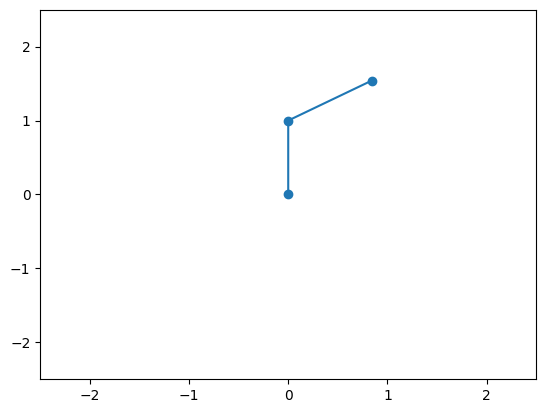

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

class Pendulum:
    def __init__(self, theta1, theta2, dt):
        self.theta1 = theta1
        self.theta2 = theta2

        self.p1 = 0.0
        self.p2 = 0.0

        self.dt = dt

        self.g = 9.81
        self.length = 1.0

        self.trajectory = [self.polar_to_cartesian()]

    def polar_to_cartesian(self):
        x1 = self.length * np.sin(self.theta1)
        y1 = -self.length * np.cos(self.theta1)

        x2 = x1 + self.length * np.sin(self.theta2)
        y2 = y1 - self.length * np.cos(self.theta2)

        return np.array([[0.0, 0.0], [x1, y1], [x2, y2]])

    def evolve(self):
        theta1 = self.theta1
        theta2 = self.theta2
        p1 = self.p1
        p2 = self.p2
        g = self.g
        l = self.length

        expr1 = np.cos(theta1 - theta2)
        expr2 = np.sin(theta1 - theta2)
        expr3 = (1 + expr2**2)
        expr4 = p1 * p2 * expr2 / expr3
        expr5 = (p1**2 + 2 * p2**2 - p1 * p2 * expr1) * np.sin(2 * (theta1 - theta2)) / 2 / expr3**2
        expr6 = expr4 - expr5

        self.theta1 += self.dt * (p1 - p2 * expr1) / expr3
        self.theta2 += self.dt * (2 * p2 - p1 * expr1) / expr3
        self.p1 += self.dt * (-2 * g * l * np.sin(theta1) - expr6)
        self.p2 += self.dt * (-g * l * np.sin(theta2) + expr6)

        new_position = self.polar_to_cartesian()
        self.trajectory.append(new_position)
        return new_position

class Animator:
    def __init__(self, pendulum, draw_trace=False):
        self.pendulum = pendulum
        self.draw_trace = draw_trace
        self.time = 0.0

        # set up the figure
        self.fig, self.ax = plt.subplots()
        self.ax.set_ylim(-2.5, 2.5)
        self.ax.set_xlim(-2.5, 2.5)

        # prepare a text window for the timer
        self.time_text = self.ax.text(0.05, 0.95, '',
                                      horizontalalignment='left',
                                      verticalalignment='top',
                                      transform=self.ax.transAxes)

        # initialize by plotting the last position of the trajectory
        self.line, = self.ax.plot(self.pendulum.trajectory[-1][:, 0],
                                  self.pendulum.trajectory[-1][:, 1],
                                  marker='o')

        # trace the whole trajectory of the second pendulum mass
        if self.draw_trace:
            self.trace, = self.ax.plot(
                [a[2, 0] for a in self.pendulum.trajectory],
                [a[2, 1] for a in self.pendulum.trajectory])

    def advance_time_step(self):
        while True:
            self.time += self.pendulum.dt
            yield self.pendulum.evolve()

    def update(self, data):
        self.time_text.set_text(f'Elapsed time: {self.time:6.2f} s')

        self.line.set_ydata(data[:, 1])
        self.line.set_xdata(data[:, 0])

        if self.draw_trace:
            self.trace.set_xdata([a[2, 0] for a in self.pendulum.trajectory])
            self.trace.set_ydata([a[2, 1] for a in self.pendulum.trajectory])
        return self.line,

    def animate(self):
        self.animation = animation.FuncAnimation(self.fig, self.update,
                                                 frames=self.advance_time_step(),
                                                 interval=25,
                                                 blit=False,
                                                 cache_frame_data=False)

pendulum = Pendulum(theta1=np.pi, theta2=np.pi - 1, dt=1)
animator = Animator(pendulum=pendulum, draw_trace=True)
animator.animate()
plt.show()
